In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import pandas as pd
import configs
from scipy.optimize import curve_fit

# Load Meta-RL results

In [2]:

engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
wandb_project = "darkroom_simple"

env_name = "darkroom_fixedxy_dim5_corr0.0_state_dim2_envs900000_H200_explore"
model_name = "transformer_end_query_embd512_layer4_head4_lr0.0001_drop0_initseed0_batch1024"

env_name = "darkroom_dim5_corr0.0_state_dim10_envs900000_H200_explore"
model_name = "transformer_end_query_embd512_layer4_head4_lr0.0001_drop0_initseed0_batch1024"

env_name = "darkroom_dim5_corr0.0_state_dim10_envs900000_H200_explore"
model_name = "transformer_end_query_embd256_layer4_head4_lr0.0001_drop0_initseed0_batch1024"

env_name = "darkroom_dim5_corr0.0_state_dim10_envs900000_H200_explore"
model_name = "transformer_end_query_embd256_layer3_head4_lr0.0001_drop0_initseed0_batch1024"

env_name = "darkroom_fixedxy_dim5_corr0.0_state_dim2_envs1500000_H150_explore"
model_name = "transformer_end_query_embd512_layer3_head4_lr0.0001_drop0.0_initseed0_batch1024"

env_name = "darkroom_dim5_corr0.25_state_dim10_envs1500000_H150_explore"
model_name = "transformer_end_query_embd512_layer3_head4_lr0.0001_drop0.0_initseed0_batch1024"

env_name = "darkroom_dim5_corr0.25_state_dim10_envs1500000_H150_explore"
model_name = "transformer_end_query_embd512_layer3_head4_lr0.0001_drop0.0_initseed0_batch1024"

env_name = "darkroom_dim8_corr0.25_state_dim10_envs1500000_H250_explore"
model_name = "transformer_end_query_embd512_layer3_head4_lr0.0001_drop0.0_initseed0_batch512"

env_name = "darkroom_dim6_corr0.25_state_dim10_envs1500000_H250_explore"
model_name = "transformer_end_query_embd512_layer3_head4_lr0.0001_drop0.0_initseed0_batch512"

model_path = os.path.join(engram_dir, wandb_project, env_name, "models", model_name)
path_to_pkl = os.path.join(model_path, 'eval_results_offline.pkl')


In [ ]:
def make_pca_plots(hidden_states, dims=[0,1], figname=None):
    n_layers = len(hidden_states)
    fig, axs = plt.subplots(1, n_layers, figsize=(8, 8 * n_layers))
    
    # Create a dictionary mapping (x,y) to PCA coordinates for connecting neighbors
    for layer in range(n_layers):
        X = torch.stack(hidden_states[layer])
        X = X.detach().cpu().numpy().squeeze()
        data = X[:, -1, :]
        
        # Perform PCA
        pca = PCA(n_components=10)
        data_pca = pca.fit_transform(data)
        data_pca = data_pca / np.abs(data_pca).max(axis=0)
        
        # Create mapping of maze positions to PCA coordinates
        pos_to_pca = {(x, y): data_pca[i] for i, (x, y) in enumerate(zip(xs, ys))}
        
        # Plot connections first (so they appear behind points)
        for i, (x, y) in enumerate(zip(xs, ys)):
            # Connect to right neighbor
            if (x + 1, y) in pos_to_pca:
                axs[layer].plot([data_pca[i][dims[0]], pos_to_pca[(x + 1, y)][0]],
                              [data_pca[i][dims[1]], pos_to_pca[(x + 1, y)][1]],
                              'gray', alpha=0.3, linewidth=2)
            # Connect to upper neighbor
            if (x, y + 1) in pos_to_pca:
                axs[layer].plot([data_pca[i][dims[0]], pos_to_pca[(x, y + 1)][0]],
                              [data_pca[i][dims[1]], pos_to_pca[(x, y + 1)][1]],
                              'gray', alpha=0.3, linewidth=2)
        
        # Plot the points
        pt_mask = np.ones(len(data_pca), dtype=bool)
        pt_mask[reward_idx] = False
        _quadrants = np.array(quadrants)
        axs[layer].scatter(
            data_pca[pt_mask, dims[0]], data_pca[pt_mask, dims[1]],
            c=_quadrants[pt_mask], cmap='plasma', s=50,
            alpha=1.)
        axs[layer].scatter(
            data_pca[reward_idx, 0], data_pca[reward_idx, 1],
            c='red', s=150,
            alpha=1., marker='*')
        
        axs[layer].set_aspect('equal', 'box')
        axs[layer].set_title(f'Layer {layer}')
        axs[layer].set_box_aspect(1)
        axs[layer].set_xticks([])
        axs[layer].set_yticks([])
        for spine in axs[layer].spines.values():
            spine.set_visible(True)
    
    plt.tight_layout()
    if figname is not None:
        plt.savefig('figs/' + figname, dpi=300)
    plt.show()

In [3]:
with open(path_to_pkl, "rb") as f:
    data = pickle.load(f)
metarl_df = pd.DataFrame(data)
metarl_df.head()

,model,return,environment,experienced_reward,context_length,path_length_scaled
0,Learner (temp=2),0.0,0,0,0,1.0
1,Learner (temp=1),0.0,0,0,0,1.0
2,Learner (greedy),0.0,0,0,0,1.0
3,Learner (temp=2),0.0,0,0,10,1.0
4,Learner (temp=1),0.0,0,0,10,1.0


# Include Q learning results

In [4]:
add_q_learning = True

In [32]:
# Concatenate the dataframes
if add_q_learning:
    engram_dir = "/n/holylfs06/LABS/krajan_lab/Lab/cfang/icl-maze/"
    wandb_project = "darkroom_qlearning"
    env_name = "darkroom_dim6_corr0.25_state_dim10_envs1500000_H250_explore"
    opt_return = 1

    # DQN results
    model_name = "dqn_nlayers4_gamma0.9_target10_lr1e-05"
    path_to_pkl = os.path.join(engram_dir, wandb_project, env_name, "models", model_name, "eval_results.pkl")
    with open(path_to_pkl, "rb") as f:
        data = pickle.load(f)
    dqn_df = pd.DataFrame(data)
    dqn_df = dqn_df[dqn_df['action_temps'] == 0.005]
    dqn_df = dqn_df.rename(columns={'returns': 'return'})
    dqn_df['model'] = 'DQN'
    dqn_df['path_length_scaled'] = (opt_return - dqn_df['return'])/opt_return
    dqn_df['returns_scaled'] = dqn_df['return']/opt_return

    # Q table results
    model_name = "q_table_gamma0.8"
    path_to_pkl = os.path.join(engram_dir, wandb_project, env_name, "models", model_name, "eval_results.pkl")
    with open(path_to_pkl, "rb") as f:
        data = pickle.load(f)
    qtable_df = pd.DataFrame(data)
    qtable_df = qtable_df[qtable_df['action_temps'] == 0.005]
    qtable_df = qtable_df.rename(columns={'returns': 'return'})
    qtable_df['model'] = 'Q Table'
    qtable_df['path_length_scaled'] = (opt_return - qtable_df['return'])/opt_return
    qtable_df['returns_scaled'] = qtable_df['return']/opt_return
    qtable_df.head()

    df = pd.concat([metarl_df, dqn_df, qtable_df], ignore_index=True)
else:
    df = metarl_df


<Axes: xlabel='context_length', ylabel='path_length_scaled'>

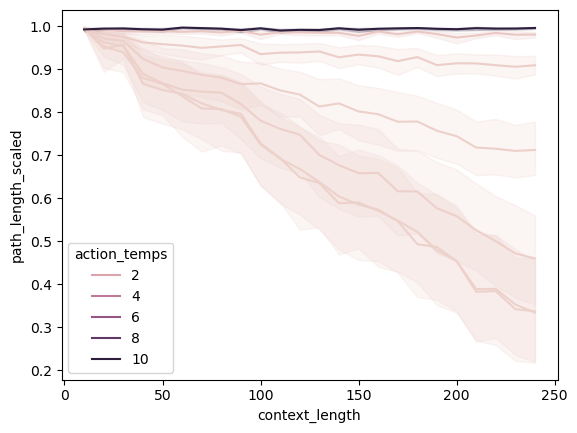

In [29]:
fig, ax = plt.subplots()
sns.lineplot(data=qtable_df, x='context_length', y='path_length_scaled', hue='action_temps', ax=ax)

<Axes: xlabel='context_length', ylabel='path_length_scaled'>

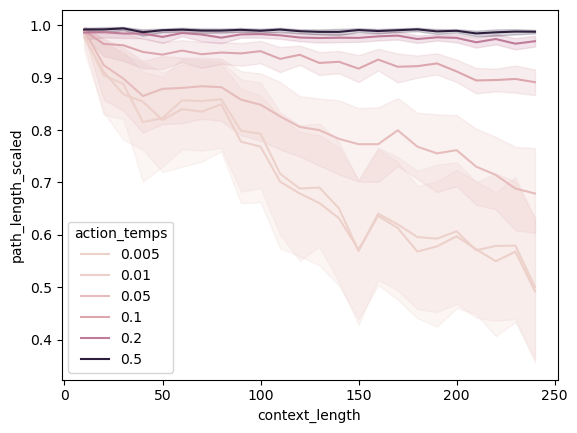

In [30]:
fig, ax = plt.subplots()
sns.lineplot(data=dqn_df, x='context_length', y='path_length_scaled', hue='action_temps', ax=ax)

# Plot all results

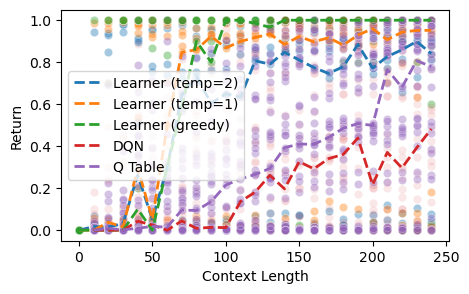

In [42]:
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

rlim = 15
_df = df[df['experienced_reward'] < rlim]

fig, ax = plt.subplots(figsize=(5,3))
for model in df['model'].unique():
    __df = _df[_df['model'] == model]
    alpha = 0.1 if model == 'DQN' else 0.4
    sns.scatterplot(
        data=__df, x='context_length', y='return',
        ax=ax, alpha=alpha)
    
    # Group by experienced_reward and get mean path_length_scaled
    x = __df['context_length']
    y = __df['return']
    grouped = __df.groupby('context_length')['return'].median().reset_index()
    mean_x = grouped['context_length']
    mean_y = grouped['return']
    ax.plot(mean_x, mean_y, '--', label=model, linewidth=2)
ax.legend()
plt.xlabel('Context Length')
plt.ylabel('Return')
plt.show()


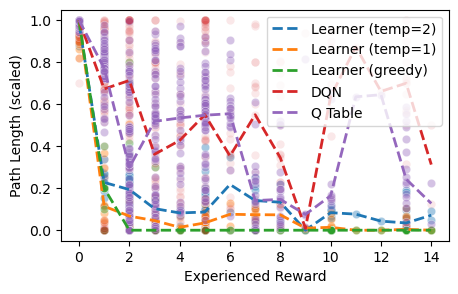

In [36]:
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

rlim = 15
_df = df[df['experienced_reward'] < rlim]

fig, ax = plt.subplots(figsize=(5,3))
for model in df['model'].unique():
    __df = _df[_df['model'] == model]
    alpha = 0.1 if model == 'DQN' else 0.4
    sns.scatterplot(
        data=__df, x='experienced_reward', y='path_length_scaled',
        ax=ax, alpha=alpha)
    
    # Group by experienced_reward and get mean path_length_scaled
    x = __df['experienced_reward']
    y = __df['path_length_scaled']
    grouped = __df.groupby('experienced_reward')['path_length_scaled'].median().reset_index()
    mean_x = grouped['experienced_reward']
    mean_y = grouped['path_length_scaled']
    
    popt, _ = curve_fit(exp_func, x, y, p0=[1, 1e-3, 0])
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = exp_func(x_fit, *popt)
    ax.plot(mean_x, mean_y, '--', label=model, linewidth=2)
ax.legend()
plt.xlabel('Experienced Reward')
plt.ylabel('Path Length (scaled)')
plt.show()


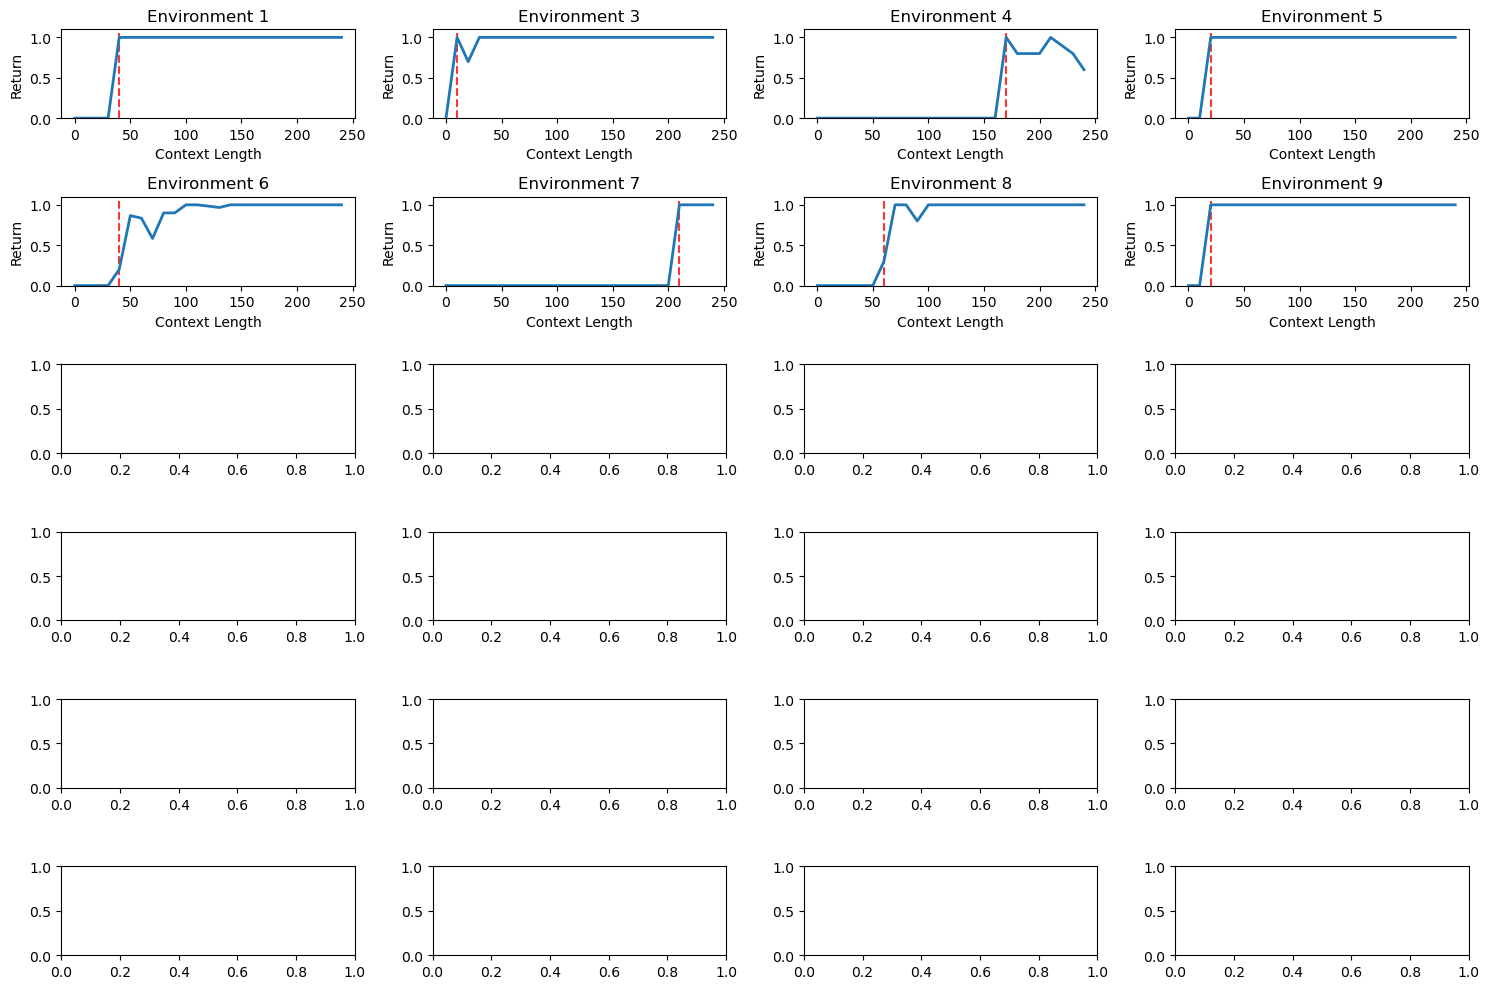

In [34]:
rlim = 30
_df = df[df['model'] == 'Learner (greedy)']
sample_envs = _df['environment'].unique()

# Create 3x4 subplot grid
n_rows = 6
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()
n_envs_plotted = 0
n_envs_total = n_rows * n_cols
for env in sample_envs:
    env_df = _df[_df['environment'] == env]
    # Find first context length where reward > 0
    first_reward = env_df[env_df['experienced_reward'] > 0]['context_length'].min()
    if pd.notna(first_reward) and first_reward < 1000:
        axes[n_envs_plotted].axvline(x=first_reward, color='r', linestyle='--', alpha=0.8)
    else:
        continue
    sns.lineplot(
        data=env_df,
        x='context_length',
        y='return',
        ax=axes[n_envs_plotted],
        linewidth=2
    )
    axes[n_envs_plotted].set_title(f'Environment {env}')
    axes[n_envs_plotted].set_xlabel('Context Length')
    axes[n_envs_plotted].set_ylabel('Return')
    axes[n_envs_plotted].set_ylim(0, max(1, env_df['return'].max()*1.1))

    n_envs_plotted += 1
    if n_envs_plotted == n_envs_total:
        break

plt.tight_layout()
plt.show()
